<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Matrix review

Estimated time needed: **45** minutes


Matrix operations are a fundamental part of machine learning and many other fields, such as digital signal processing, optimization, control systems, and computer graphics. As a result, there has been a lot of work on optimizing matrix operations, not only in software, but also in hardware. Let's say that you work for an AI hardware  company, and that company has developed a new processor that can only perform matrix operations. The company needs you to implement some popular  statistics such as the mean, variance, and [Principle component analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) using matrix operations.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/technology-electronic-device-computer-hardware-computer-component-electronics-motherboard-personal-computer-hardware-cpu-computer-accessory-1536663.jpeg" width="500" alt="https://pxhere.com/en/photo/1536663">


## Table of Contents

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-required-libraries">Installing required libraries</a></li>
            <li><a href="#Importing-required-libraries">Importing required libraries</a></li>
            <li><a href="#Defining-helper-functions">Defining helper gunctions</a></li>
        </ol>
    </li>
    <li>
        <a href="#Basics-of-Matrices">Basics of matrices</a>
        <ol>
            <li><a href="#What%27s-a-Matrix?">What's a matrix? </a></li>
            <li><a href="#Rank-of-a-Matrix">Rank of a matrix </a></li>
            <li><a href="#Frobenius-Norm-of-a-Matrix">Frobenius norm of a matrix</a></li>
            <li><a href="#Matrix-Addition"> Matrix addition</a></li>
        </ol>
    </li>
  <li>
        <a href="#Matrix-and-Vector-Multiplication">Matrix and vector multiplication</a>
        <ol>
            <li><a href="#Dot-product"> Dot product </a></li>
            <li><a href="#The-outer-product">The outer product</a></li>
            <li><a href="#Matrix-and-vector-multiplication">Matrix and vector multiplication</a></li>
            <li><a href="#Multiplying-matrices">Multiplying matrices</a></li>
     </ol>
   </li>
   <li>
        <a href="#Eigen-decomposition">Eigen-decomposition</a>
        <ol>
            <li><a href="#Eigenvectors-and-Eigenvalues"> Eigenvectors and Eigenvalues </a></li>
            <li><a href="#Factorization-for-PCA">Factorization for PCA</a></li>
        </ol>     
   </li>

 </ol>    


***


## Objectives

After completing this lab, you understand:

*   Basic matrix operations such as matrix addition, vector multiplication, and Eigen decomposition

*   How to apply these matrix operations using NumPy


## Setup


This lab uses the following libraries:

*   [`NumPy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for mathematical operations
*   [`Matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for visualizing the data
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for machine learning and machine learning pipeline-related functions


### Installing required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However, if you run this notebook's commands in a different Jupyter environment (for example, Watson Studio or Ananconda) you must install these libraries by removing the `#` sign before `!mamba` in the following code cell.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install pandas ==1.3.4 ..."


You can install and use  <a href="https://www.sympy.org/en/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01">SymPy </a> to print matrices by using the following `conda` command.


In [ ]:
#!conda install -c anaconda sympy -y

### Importing required libraries


In [3]:
# Surpress warnings from using older version of sklearn:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np 
import matplotlib.pylab as plt

from sklearn.decomposition import PCA
from sympy import Matrix, init_printing,Symbol
from numpy.linalg import qr,eig,inv,matrix_rank,inv, norm
from scipy.linalg import null_space
init_printing()

### Defining helper functions

Use this section to define any helper functions to help the readability of the notebook's code.


In [4]:
def plot_2da(dict_):
    for key, value in dict_.items():
        plt.scatter(value[:, 0], value[:, 1],label=key)
    plt.legend()
    plt.show()
    
def plot_2db(dict_):
    for key, value in dict_.items():
        if value.shape[0]>2:
            plt.scatter(value[:, 0], value[:, 1],label=key)
        else:
            print(value)
            plt.quiver([0],[0],value[:,0],value[:,1],label=key)
    plt.legend()
    plt.show()

## Basics of matrices


### What's a matrix?


A matrix is just a horizontal stack of columns vectors or a vertical stack of row vectors. For example, a two-column matrix $\mathbf{A}$ can be written as a horizontal stack of its two columns: $\mathbf{A}=[\mathbf{a}_{1},\mathbf{a}_{2}]$, where $\mathbf{a}_{i}$ is a column vector. `NumPy` treats matrix objects as NumPy arrays. You can use the `Matrix` function from `SymPy` to print matrices in a nice way.


In [5]:
A=np.array([[2,-3],[4,7]])

Matrix(A)

⎡2  -3⎤
⎢     ⎥
⎣4  7 ⎦

**Note**: In this particular case, matrix $\mathbf{A}$ is a <b>square matrix</b> because it has an equal number of rows and columns.


You can subset matrix $\mathbf{A}$ to pull out column vectors $\mathbf{a}_{1}$ and $\mathbf{a}_{2}$ using `NumPy`'s indexing syntax.


In [6]:
a1=A[:,0]
a1

array([2, 4])

In [7]:
a2=A[:,1]
a2

array([-3,  7])

A transpose of a matrix, denoted by $\mathbf{A}^{T}$, switches the row and column indices of the matrix. In `NumPy` you can transpose matrix $\mathbf{A}$ as follows:


In [8]:
AT=A.T
Matrix(AT)

⎡2   4⎤
⎢     ⎥
⎣-3  7⎦

### Rank of a matrix


The rank of a matrix is the number of dimensions the rows of the matrix "live in."  A square matrix is said to be **full rank** if its <a href='https://en.wikipedia.org/wiki/Rank_(linear_algebra)?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01'>rank</a> is equal to the number of its rows or columns. Using `NumPy`, you can find the rank of a matrix using:


In [9]:
matrix_rank(A)

2

You can also plot the columns of matrix $\mathbf{A}$ as vectors.


<unknown>:3: SyntaxWarning: invalid escape sequence '\m'
<unknown>:4: SyntaxWarning: invalid escape sequence '\m'
<unknown>:5: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<ipython-input-10-faf6f3e85582>:3: SyntaxWarning: invalid escape sequence '\m'
  ax.quiver([0, 0],[0, 0],A[0,0], A[1,0],scale=30,label="$\mathbf{a}_{1}$")
<ipython-input-10-faf6f3e85582>:4: SyntaxWarning: invalid escape sequence '\m'
  ax.quiver([0, 0],[0, 0],A[0,1], A[1,1],scale=30,label="$\mathbf{a}_{2}$",color='red')
<ipython-input-10-faf6f3e85582>:5: SyntaxWarning: invalid escape sequence '\m'
  plt.title("columns of $\mathbf{A}$ ")


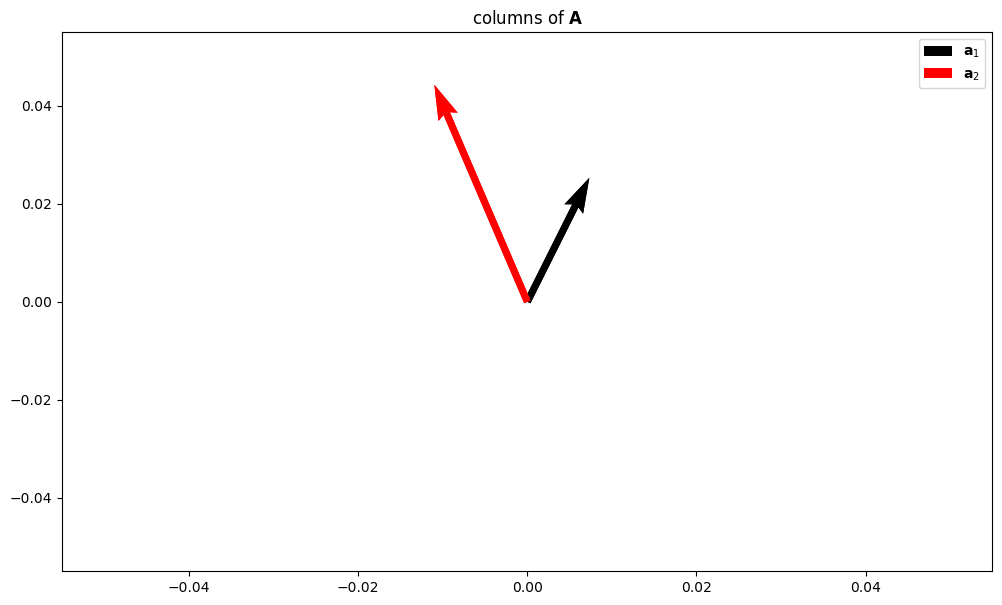

In [10]:
fig, ax = plt.subplots(figsize = (12, 7))

ax.quiver([0, 0],[0, 0],A[0,0], A[1,0],scale=30,label="$\mathbf{a}_{1}$")
ax.quiver([0, 0],[0, 0],A[0,1], A[1,1],scale=30,label="$\mathbf{a}_{2}$",color='red')
plt.title("columns of $\mathbf{A}$ ")
plt.legend()
plt.show()

Because the vectors are not parallel, you can define any point on the 2d space as a scaled  combination of those two vectors.

If any of the columns in a matrix are multiples of each other, the vectors point in the same direction and the matrix is not full rank (in other words, the matrix is **rank-deficient**). Vectors point in the same direction if one of the vectors is a linear combination of another.


In [11]:
F=np.array([[2,4],[4,8]])
matrix_rank(F)

1

You can graph the vectors to see them pointing in the same direction.


<unknown>:2: SyntaxWarning: invalid escape sequence '\m'
<unknown>:3: SyntaxWarning: invalid escape sequence '\m'
<unknown>:4: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<ipython-input-12-17cf79a78ba3>:2: SyntaxWarning: invalid escape sequence '\m'
  ax.quiver([0, 0],[0, 0],F[0,1], F[1,1],scale=30,label="$\mathbf{f}_{2}$",color='red')
<ipython-input-12-17cf79a78ba3>:3: SyntaxWarning: invalid escape sequence '\m'
  ax.quiver([0, 0],[0, 0],F[0,0], F[1,0],scale=30,label="$\mathbf{f}_{1}$")
<ipython-input-12-17cf79a78ba3>:4: SyntaxWarning: invalid escape sequence '\m'
  plt.title("columns of $\mathbf{F}$ ")


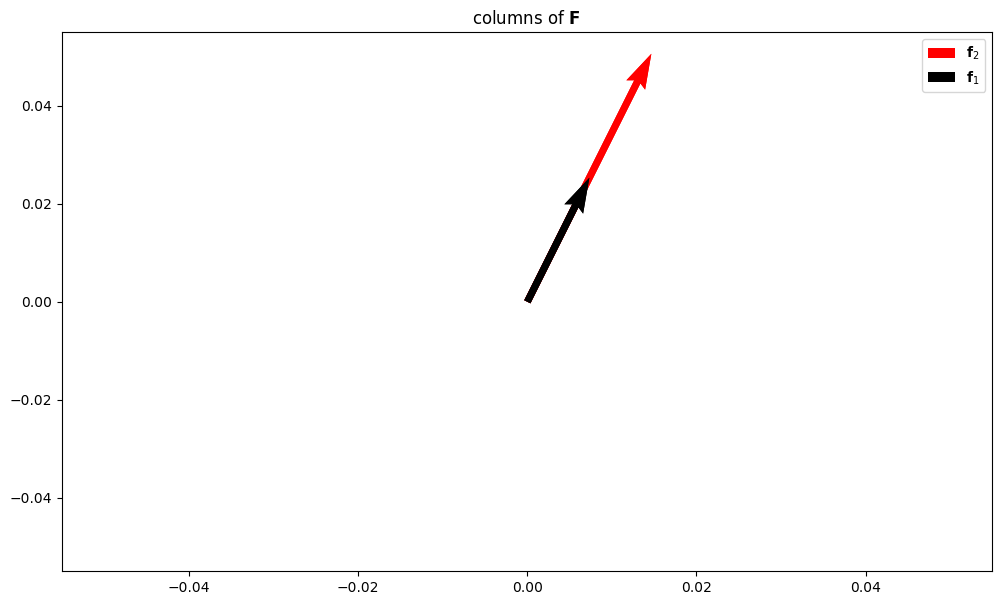

In [12]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.quiver([0, 0],[0, 0],F[0,1], F[1,1],scale=30,label="$\mathbf{f}_{2}$",color='red')
ax.quiver([0, 0],[0, 0],F[0,0], F[1,0],scale=30,label="$\mathbf{f}_{1}$")
plt.title("columns of $\mathbf{F}$ ")
plt.legend()
plt.show()

Of course, rank deficiency can also occur if a column is a linear combination of several columns. For example:


In [13]:
G=np.array([[2,4,6],[6,4,2],[16,16,16]])
matrix_rank(G)

2

In this case, $ \mathbf{g}_3 = 2 \mathbf{g}_1 + 2 \mathbf{g}_2 $.


Although a matrix that has more columns than rows is possible, a more common occurrence in data science is a matrix that has more rows than columns. Consider the matrix $\mathbf{F}$:


In [14]:
F=np.array([[1,2],[1,-2],[-1,1]])
Matrix(F)

⎡1   2 ⎤
⎢      ⎥
⎢1   -2⎥
⎢      ⎥
⎣-1  1 ⎦

Although there are 3 rows in matrix $\mathbf{F}$, you can only describe a point lying on a 2D plane, as shown in the following example.


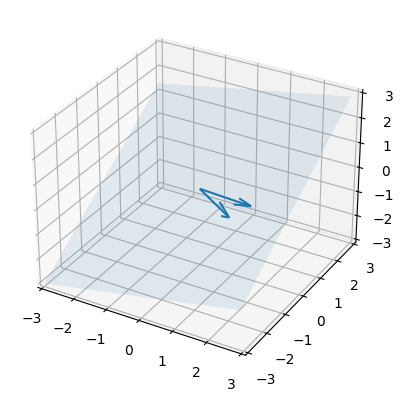

In [15]:
ax = plt.figure().add_subplot(projection='3d')
p=null_space(F.T)
xx, yy = np.meshgrid(np.arange(-3,3,0.1), np.arange(-3,3,0.1))
z=(p[0]*xx+p[1]*yy)/p[2]
ax.plot_surface(xx, yy, z, alpha=0.1)
ax.quiver([0,0], [0,0], [0,0], F[0,:], F[1,:], F[2,:])

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])
plt.show()

Therefore, the rank of such a matrix is 2. You can verify this using `NumPy`.


In [16]:
matrix_rank(F)

2

### Frobenius norm of a matrix


The **Frobenius norm**, sometimes called the **Euclidean norm**, is the matrix norm of an $m×n$ matrix $\mathbf{A}$, where matrix $\mathbf{A}$ is defined as the square root of the sum of the absolute squares of its elements.

$$||\mathbf{A}||_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n |a_{ij}|^2}$$

Reusing matrix $\mathbf{A}$ that was defined above:


In [17]:
Matrix(A), norm(A)

⎛⎡2  -3⎤                   ⎞
⎜⎢     ⎥, 8.831760866327848⎟
⎝⎣4  7 ⎦                   ⎠

The matrix norm can also be calculated manually using the provided formula


In [18]:
m, n = A.shape[0], A.shape[1] # get number of rows and columns 
sumsquares = 0

for i in range(m):
    for j in range(n):
        sumsquares += A[i,j] ** 2
np.sqrt(sumsquares)

### Matrix ddition


Addition is only defined for two matrices that have an equal number of rows and columns. Consider two matrices $\mathbf{A}$ and $\mathbf{B}$:


$\begin{align}
\mathbf{A}= \begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\\\\\
a_{21} & a_{22} & \cdots & a_{2n} \\\\
\vdots & \vdots & \ddots & \vdots \\\\
a_{m1} & a_{m2} & \cdots & a_{mn} \\\\
\end{bmatrix}
\end{align}$
$\begin{align}
\mathbf{B}=\begin{bmatrix}
b_{11} & b_{12} & \cdots & b_{1n} \\\\
b_{21} & b_{22} & \cdots & b_{2n} \\\\
\vdots & \vdots & \ddots & \vdots \\\\
b_{m1} & b_{m2} & \cdots & b_{mn} \\\\
\end{bmatrix}
\end{align}$


To perform the addition, you add elements that have identical row and column indices.


$\begin{align}
\mathbf{A}+\mathbf{B}=\begin{bmatrix}
a_{11} + b_{11} & a_{12} + b_{12} & \cdots & a_{1n} + b_{1n} \\\\\\
a_{21} + b_{21} & a_{22} + b_{22} & \cdots & a_{2n} + b_{2n} \\\\
\vdots & \vdots & \ddots & \vdots \\\\
a_{m1} + b_{m1} & a_{m2} + b_{m2} & \cdots & a_{mn} + b_{mn} \\\\
\end{bmatrix}
\end{align}$


In `NumPy`, if you reuse matrix $\mathbf{A}$ from before and define matrix $\mathbf{B}$ as follows:


In [19]:
B=np.array([[1,1],[1,-1]])
Matrix(B)

⎡1  1 ⎤
⎢     ⎥
⎣1  -1⎦

you can perform the addition using:


In [20]:
C=A+B
Matrix(C)

⎡3  -2⎤
⎢     ⎥
⎣5  6 ⎦

Matrix $\mathbf{B}$ defined previously is **symmetric**. This means that $\mathbf{B}=\mathbf{B}^{T}$. You can verify this using Python.


In [21]:
B_T=B.T
Matrix(B_T)

⎡1  1 ⎤
⎢     ⎥
⎣1  -1⎦

A symmetric matrix $\mathbf{S}$ can be created using $\mathbf{S}=\mathbf{C}+\mathbf{C}^T$, where $\mathbf{C}$ is any matrix.


In [22]:
C=np.random.randn(2,2)
S=C+C.T

In [23]:
Matrix(S)

⎡0.89959533290702   0.510567536340365⎤
⎢                                    ⎥
⎣0.510567536340365  -2.3188989807366 ⎦

In [24]:
Matrix(S.T)

⎡0.89959533290702   0.510567536340365⎤
⎢                                    ⎥
⎣0.510567536340365  -2.3188989807366 ⎦

A <b>diagonal matrix</b> is a matrix in which the entries off the main diagonal are all zero.


In [25]:
Matrix(np.diag(np.array([1,2,3])))

⎡1  0  0⎤
⎢       ⎥
⎢0  2  0⎥
⎢       ⎥
⎣0  0  3⎦

A matrix where all entries on the main diagonal are equal to one and all the entries off the main diagonal are zero is called an **identity matrix**. In `NumPy`, an identity matrix can be created by using:


In [26]:
Matrix(np.eye(3).astype(int))

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

## Matrix and vector multiplication


### Dot product


Given two equal length column vectors $\mathbf{a}$ and $\mathbf{b}$, you can define their dot product as:


$ \mathbf{a}^T \cdot \mathbf{b} = \mathbf{a}^T  \mathbf{b} = \sum_{i=1}^n a_i b_i = a_1 b_1 + \cdots + a_n b_n$


Vectors in `NumPy` can be defined as one-dimensional arrays.


In [27]:
a=np.array([1,1])
b=np.array([1,2])
Matrix(a)

⎡1⎤
⎢ ⎥
⎣1⎦

To verify that the dimension of a vector is indeed one, use:


In [28]:
a.ndim

And, to find the dot product, use:


In [29]:
a.T@b

3

### Exercise 1

Calculate the dot product of vectors $\mathbf{a}$ and $\mathbf{one}$.


In [31]:
one=np.ones(2)

### Insert your solution here ###
a.T@one

<details>
    <summary>Click here for solution</summary>

```python
a.T@one
```

</details>


### The outer product


The outer product is another useful matrix operation. Consider a vector $ \mathbf{u}$ of size $m \times 1$ and a vector $\mathbf{v}$ of size $n \times 1$. Then, their outer product is:


$
\mathbf{u} \otimes \mathbf{v} = \mathbf{u}\mathbf{v}^\textsf{T} =
\begin{bmatrix}u_1 \\\\\\ u_2 \\ \vdots \\ u_m\end{bmatrix}
\begin{bmatrix}v_1 & v_2 & ... & v_n\end{bmatrix} =
\begin{bmatrix}
u_1 v_1 & u_1 v_2 & ... & u_1 v_n\\\\
u_2 v_1 & u_2 v_2 & ... & u_2 v_n \\\\
\vdots & \vdots  & \ddots & \vdots \\\\
u_m v_1 & u_m v_2 &  ... & u_m v_n
\end{bmatrix}
$


You can perform the outer product in `NumPy` as follows:


In [35]:
u= np.array([[1],[2],[3],[4]])
v= np.array([[0],[1],[2],[3],[6]])

### Insert your solution here ###
Matrix(u@v.T)

⎡0  1  2  3   6 ⎤
⎢               ⎥
⎢0  2  4  6   12⎥
⎢               ⎥
⎢0  3  6  9   18⎥
⎢               ⎥
⎣0  4  8  12  24⎦

<details>
    <summary>Click here for solution</summary>

```python
Matrix(u@v.T)
```

</details>


### Exercise 2

Create a matrix with 4 columns where each even column is the vector $\mathbf{u}$, else it is a vector of zeros. Show that the rank of this matrix is one.


In [36]:
u=np.array([[1],[2]])

### Insert your solution here ###
U = Matrix(u@np.array([[0,1,0,1]]))
print('The randk is:' + str(matrix_rank(np.array(U).astype(float))))
U

The randk is:1


⎡0  1  0  1⎤
⎢          ⎥
⎣0  2  0  2⎦

<details>
    <summary>Click here for solution</summary>

```python
U = Matrix(u@np.array([[0,1,0,1]]))
print('The rank is: ' + str(matrix_rank(np.array(U).astype(float))))
U
```

</details>


### Matrix and vector multiplication


You can also multiply a matrix by a vector and get a new vector. Consider the $n \times 1$ vector $\mathbf{x}$:


$
\mathbf{x}=
\begin{bmatrix}
x_1 \\\\\\
x_2 \\\\
\vdots \\\\
x_n
\end{bmatrix}
$


The following $\mathbf{Ax}=\mathbf b$  matrix multiplication  is defined as the dot product of vector $\mathbf{x}$ with each row of $\mathbf{A}$, an $m \times n$ matrix:


$
\begin{bmatrix}
a_{11}x_1+\cdots + a_{1n}x_n=b_1
\\\\\\ a_{21}x_1+\cdots + a_{2n}x_n =b_2
\\\\ \vdots
\\\\ a_{m1}x_1+\cdots + a_{mn}x_n =b_m
\end{bmatrix}
$


Where


$
\mathbf{b}=
\begin{bmatrix}
b_1 \\\\\\
b_2 \\\\
\vdots \\\\
b_m
\end{bmatrix}
$


In `NumPy`:


In [37]:
x=np.array([1,1])
x

array([1, 1])

In [38]:
A=np.array([[0,-1],[1,0]])
Matrix(A)

⎡0  -1⎤
⎢     ⎥
⎣1  0 ⎦

In [39]:
b=A@x
Matrix(b)

⎡-1⎤
⎢  ⎥
⎣1 ⎦

You see that vector $\mathbf{b}$ is a combination of the columns of $\mathbf{A}$ with the weights from vector $\mathbf{x}$.

$\mathbf{b}=x_{1}\mathbf{a}_{1}+x_{2}\mathbf{a}_{2}$


If, for some angle $\theta$, matrix $\mathbf{A}$ can be constructed as:

$\begin{align}
\mathbf{A}= \begin{bmatrix}
cos \theta & -sin \theta \\\\\\
sin \theta & cos \theta
\end{bmatrix}
\end{align}$

Then $\mathbf{A}$ is known as a [rotation matrix](https://en.wikipedia.org/wiki/Rotation_matrix). If $\mathbf{A}$ is a rotation matrix, then vector $\mathbf{b}$ is a rotation of vector $\mathbf{x}$ by $\theta$ degrees counterclockwise if $\theta$ is positive, or clockwise if $\theta$ is negative.

For example, note that
$\begin{align}
\mathbf{A}= \begin{bmatrix}
0 & -1 \\\\
1 & 0
\end{bmatrix}
\end{align}$
is a rotation matrix for $\theta = 90$. Thus, vector $\mathbf{b}$ is just a 90-degree counterclockwise rotation of vector $\mathbf{x}$.


<unknown>:2: SyntaxWarning: invalid escape sequence '\m'
<unknown>:3: SyntaxWarning: invalid escape sequence '\m'
<unknown>:4: SyntaxWarning: invalid escape sequence '\m'
<unknown>:5: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<ipython-input-40-67ce6b99aeb0>:2: SyntaxWarning: invalid escape sequence '\m'
  ax.quiver([0, 0],[0, 0],A[0,0], A[1,0],scale=10,label="$\mathbf{a}_{1}$")
<ipython-input-40-67ce6b99aeb0>:3: SyntaxWarning: invalid escape sequence '\m'
  ax.quiver([0, 0],[0, 0],A[0,1], A[1,1],scale=10,label="$\mathbf{a}_{2}$")
<ipython-input-40-67ce6b99aeb0>:4: SyntaxWarning: invalid esca

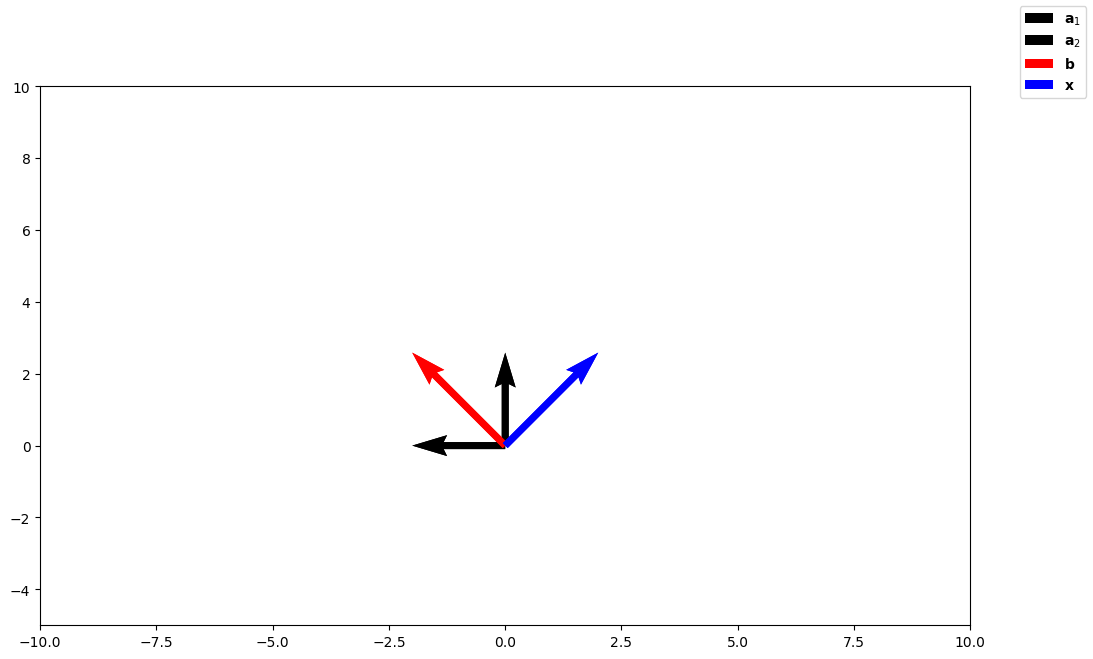

In [40]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.quiver([0, 0],[0, 0],A[0,0], A[1,0],scale=10,label="$\mathbf{a}_{1}$")
ax.quiver([0, 0],[0, 0],A[0,1], A[1,1],scale=10,label="$\mathbf{a}_{2}$")
ax.quiver([0,0],[0,0],b[0], b[1],scale=10,label="$\mathbf{b}$",color='r')
ax.quiver([0,0],[0,0],x[0], x[1],scale=10,label="$\mathbf{x}$",color='b')
ax.set_xlim([-10,10])
ax.set_ylim([-5,10])
fig.legend()
plt.show()

Matrices $\mathbf{A}$ that, for any angle $\theta$, cannot be constructed using 

$\begin{align}
\mathbf{A}= \begin{bmatrix}
cos \theta & -sin \theta \\\\\\
sin \theta & cos \theta
\end{bmatrix}
\end{align}$

are not rotation matrices. Evaluating $\mathbf{Ax}=\mathbf b$ for these matrices will cause $\mathbf{b}$ to be longer or shorter than $\mathbf{x}$.

For example, 
$\begin{align}
\mathbf{A}= \begin{bmatrix}
-1 & 1 \\\\
1 & 2
\end{bmatrix}
\end{align}$
is a not a rotation matrix, as you can see using the following diagram:


In [41]:
A=np.array([[-1,1],[1,2]])
Matrix(A)

⎡-1  1⎤
⎢     ⎥
⎣1   2⎦

In [42]:
b=A@x
Matrix(b)

⎡0⎤
⎢ ⎥
⎣3⎦

<unknown>:2: SyntaxWarning: invalid escape sequence '\m'
<unknown>:3: SyntaxWarning: invalid escape sequence '\m'
<unknown>:4: SyntaxWarning: invalid escape sequence '\m'
<unknown>:5: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<ipython-input-43-67ce6b99aeb0>:2: SyntaxWarning: invalid escape sequence '\m'
  ax.quiver([0, 0],[0, 0],A[0,0], A[1,0],scale=10,label="$\mathbf{a}_{1}$")
<ipython-input-43-67ce6b99aeb0>:3: SyntaxWarning: invalid escape sequence '\m'
  ax.quiver([0, 0],[0, 0],A[0,1], A[1,1],scale=10,label="$\mathbf{a}_{2}$")
<ipython-input-43-67ce6b99aeb0>:4: SyntaxWarning: invalid esca

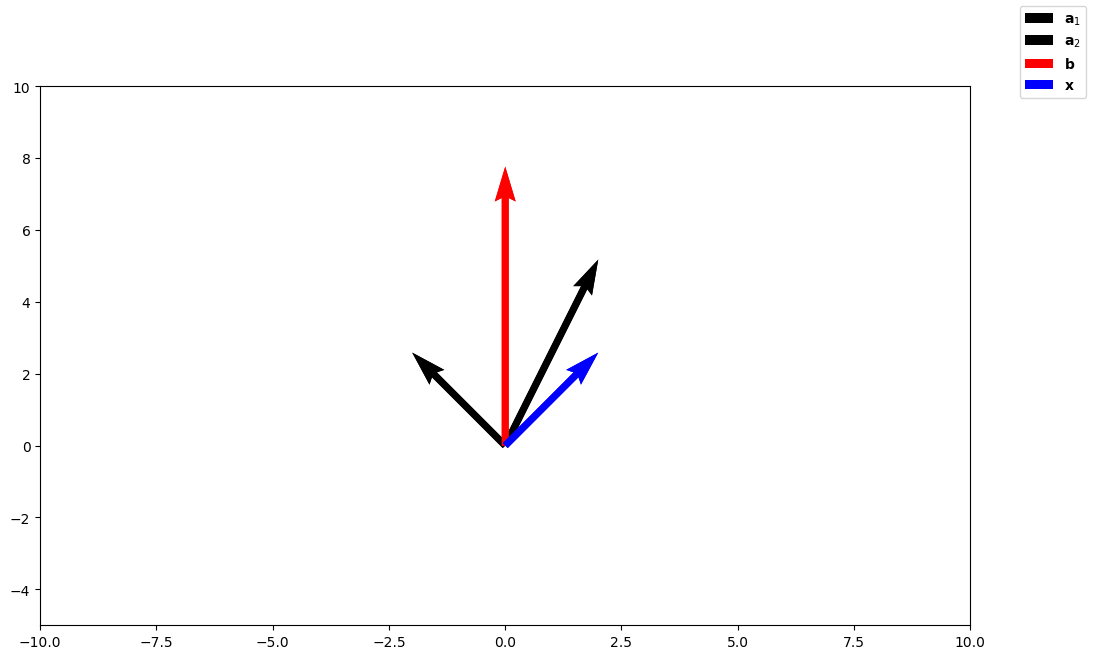

In [43]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.quiver([0, 0],[0, 0],A[0,0], A[1,0],scale=10,label="$\mathbf{a}_{1}$")
ax.quiver([0, 0],[0, 0],A[0,1], A[1,1],scale=10,label="$\mathbf{a}_{2}$")
ax.quiver([0,0],[0,0],b[0], b[1],scale=10,label="$\mathbf{b}$",color='r')
ax.quiver([0,0],[0,0],x[0], x[1],scale=10,label="$\mathbf{x}$",color='b')
ax.set_xlim([-10,10])
ax.set_ylim([-5,10])
fig.legend()
plt.show()

### Multiplying matrices


If a matrix $\mathbf{C}$ is the product of matrix $\mathbf{A}$ with dimensions $m \times n$ and matrix $\mathbf{B}$ with dimensions $n \times p$, then the $i$th row $j$th column of $\mathbf{C}$ is obtained by multiplying term-by-term the entries of the $i$th row of $\mathbf{A}$ and the $j$th column of $\mathbf{B}$, and summing the $n$ products. In other words, you can also think of the  $i$th row $j$th column of $\mathbf{C}$ as the dot product of the $i$th row of $\mathbf{A}$  and the $j$th column of $\mathbf{B}$. The resulting matrix $\mathbf{C}$ will have dimensions $m \times p$.


$\mathbf{C}=\mathbf{AB}$

$\mathbf{C}=\begin{pmatrix}
a_{11}b_{11} +\cdots + a_{1n}b_{n1} & a_{11}b_{12} +\cdots + a_{1n}b_{n2} & \cdots & a_{11}b_{1p} +\cdots + a_{1n}b_{np} \\\\\\
a_{21}b_{11} +\cdots + a_{2n}b_{n1} & a_{21}b_{12} +\cdots + a_{2n}b_{n2} & \cdots & a_{21}b_{1p} +\cdots + a_{2n}b_{np} \\\\
\vdots & \vdots & \ddots & \vdots \\\\
a_{m1}b_{11} +\cdots + a_{mn}b_{n1} & a_{m1}b_{12} +\cdots + a_{mn}b_{n2} & \cdots & a_{m1}b_{1p} +\cdots + a_{mn}b_{np} \\\\
\end{pmatrix} $


In [44]:
C=A@B
Matrix(C)

⎡0  -2⎤
⎢     ⎥
⎣3  -1⎦

If a square matrix is full rank, it can be inverted: $\mathbf{A}^{-1}$.


In [45]:
A_inv=inv(A)
Matrix(A_inv)

⎡-0.666666666666667  0.333333333333333⎤
⎢                                     ⎥
⎣0.333333333333333   0.333333333333333⎦

This can be a complex computation. If you multiply a matrix with its inverse, you get the Identity matrix $\mathbf{AA}^{-1}=I$.


In [46]:
I=np.round(A@A_inv, 8)
Matrix(I)

⎡1.0   0 ⎤
⎢        ⎥
⎣ 0   1.0⎦

Naturally, the inverse of an inverted matrix is the uninverted matrix, thus $\mathbf{A^{-1}A}=I$.


In [47]:
I=np.round(A_inv@A, 8)
Matrix(I)

⎡1.0   0 ⎤
⎢        ⎥
⎣ 0   1.0⎦

If you multiply any square matrix with an Identity matrix, you get the original Matrix. For example, $\mathbf{IA}=\mathbf{A}$. Using `NumPy`:


In [48]:
Matrix((A@I))

⎡-1.0  1.0⎤
⎢         ⎥
⎣1.0   2.0⎦

Finally, note that the order in which matrices are multiplied matters, whereas for scalars it does not. For example, for two matrices $\mathbf{A}$ and $\mathbf{B}$, $\mathbf{AB}$ will typically not equal $\mathbf{BA}$.


### Exercise 3

Use the inverse of  matrix $\mathbf{A}$ to solve for $\mathbf{x}$ given $\mathbf{b}$ and assign it to `x_`. Compare the result to `x`.


In [49]:
### Insert your solution here ###
x_=A_inv@b
print("x_:",x_)
print("x:",x)

x_: [1. 1.]
x: [1 1]


<details>
    <summary>Click here for solution</summary>

```python
x_=A_inv@b
print("x_ :",x_)
print("x:",x)
```

</details>


Another type of matrix is an **orthogonal matrix**. An orthogonal matrix is extremely useful. If matrix $\mathbf{Q}$ is orthogonal, then $Q^T=Q^{-1}$, and the rows and columns are also orthogonal. For example:


In [50]:
Q=np.array([[1,1],[1,-1]])*2**(-1/2)
Q

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

You can verify that $Q^T=Q^{-1}$.


In [51]:
I=Q@Q.T
Matrix(I)

⎡1.0   0 ⎤
⎢        ⎥
⎣ 0   1.0⎦

And, graphically, you can show that the column vectors are indeed orthogonal.


<unknown>:2: SyntaxWarning: invalid escape sequence '\m'
<unknown>:3: SyntaxWarning: invalid escape sequence '\m'
<unknown>:4: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<ipython-input-52-a3e41576df84>:2: SyntaxWarning: invalid escape sequence '\m'
  ax.quiver([0, 0],[0, 0],Q[0,0], Q[1,0],scale=10,label="$\mathbf{q}_{1}$")
<ipython-input-52-a3e41576df84>:3: SyntaxWarning: invalid escape sequence '\m'
  ax.quiver([0, 0],[0, 0],Q[0,1], Q[1,1],scale=10,label="$\mathbf{q}_{2}$",color='red')
<ipython-input-52-a3e41576df84>:4: SyntaxWarning: invalid escape sequence '\m'
  plt.title("columns of $\mathbf{Q}$ ")


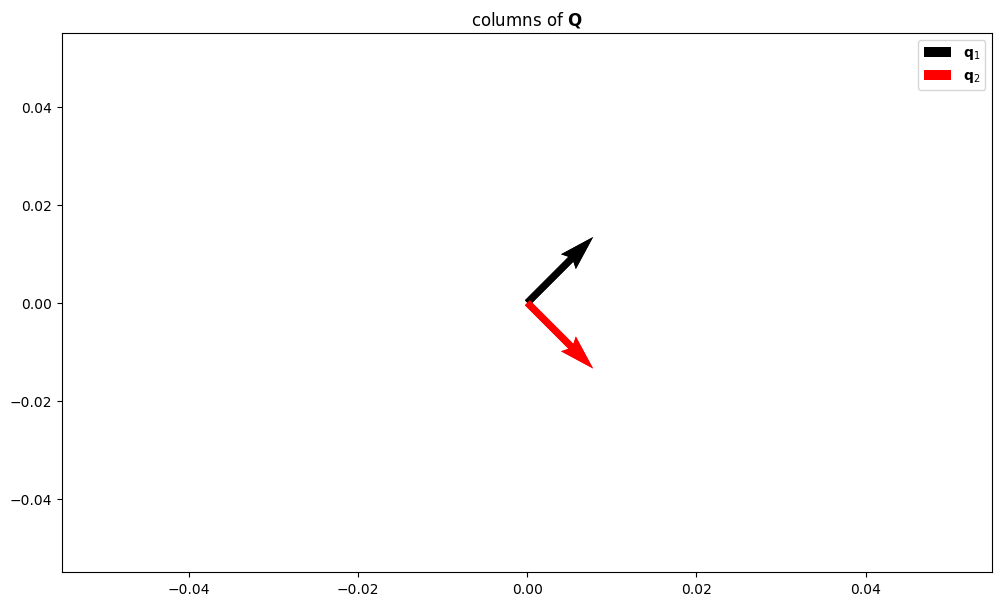

In [52]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.quiver([0, 0],[0, 0],Q[0,0], Q[1,0],scale=10,label="$\mathbf{q}_{1}$")
ax.quiver([0, 0],[0, 0],Q[0,1], Q[1,1],scale=10,label="$\mathbf{q}_{2}$",color='red')
plt.title("columns of $\mathbf{Q}$ ")
plt.legend()
plt.show()

You usually place your data in a design matrix $\textbf{X}$, where each row represents an individual sample. Consider the following example `X_`:


In [53]:
samples=200

u=np.array([[1.0,1.0],[0.10,-0.10]])/(2)**(0.5)

X_=np.dot(4*np.random.randn(samples,2),u)+10
X_[0:5]

array([[ 2.72436355,  2.67599443],
       [ 9.85406805,  9.51352447],
       [13.2950368 , 14.11434475],
       [ 4.37459624,  4.01742409],
       [ 9.8362748 ,  9.97832056]])

You can plot the samples.


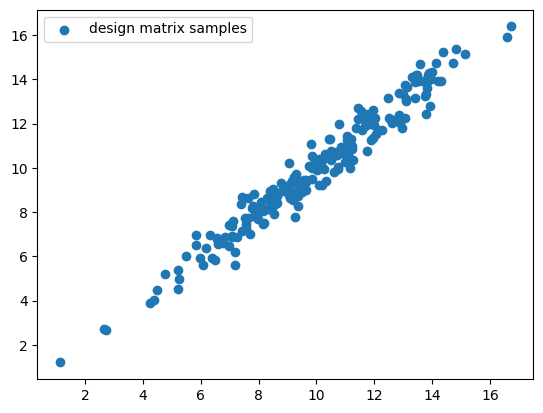

In [54]:
dict_={"design matrix samples":X_}
plot_2da(dict_)

You can find the shape of the design matrix.


In [55]:
N,D=X_.shape
print("number of smaples {}, dimensions is {}".format(N,D))

number of smaples 200, dimensions is 2


You can also perform lots of operations thanks to matrix multiplication. For example, you can find the mean using:


In [56]:
mean=(np.ones((1,N))/N)@X_
mean

array([[9.97605209, 9.96055501]])

You can verify the result using `NumPy`'s built-in `mean` array method.


In [57]:
X_.mean(axis=0)

array([9.97605209, 9.96055501])

### Exercise 4

Perform matrix multiplication using **no_mean** and **X\_**, and save the result in a variable called **X**. Show that the mean of **X** with respect to the rows is approximately zero.


In [61]:
I=np.identity(N)
col1=np.ones((1,N))
row1=np.ones((N,1))/N
no_mean=(I-row1@col1)

### Insert your solution here ###
X=no_mean@X_
print("mean of X",X.mean(axis=0))

mean of X [ 2.03836947e-15 -6.26165786e-16]


<details>
    <summary>Click here for solution</summary>

```python
X=no_mean@X_
print("mean of X",X.mean(axis=0))
```

</details>


Let's plot the original data, the zero mean data, and the location of the mean in the original data.


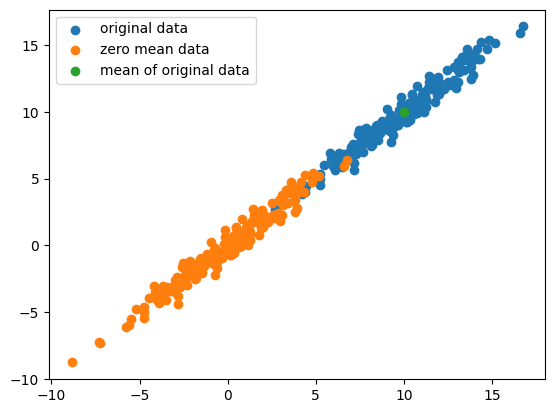

In [62]:
dict_={"original data":X_,"zero mean data":X,"mean of original data":mean}
plot_2da(dict_)    

Because you subtracted the mean, you are now able to calculate the empirical covariance matrix using matrix multiplication.


$\mathbf{C}=\frac{1}{N}   \mathbf{X}^T \mathbf{X} $


In [63]:
C=X.T@X/N
Matrix(C)

⎡7.50425019833328  7.45900460408953⎤
⎢                                  ⎥
⎣7.45900460408953   7.726933904468 ⎦

You can verify that the empirical covariance matrix is full rank.


In [64]:
matrix_rank(C)

2

## Eigen decomposition


### Eigenvectors and Eigenvalues


If a matrix is full rank, you can apply Eigen factorization or Eigen decomposition to it so that it is represented in terms of its Eigenvalues $\mathbf{\Lambda}$ and Eigenvectors embedded in matrix $\mathbf{Q}$. Symbolically:


$\mathbf{A}=\mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^{-1}$


You can obtain these matrices using `NumPy`.


In [65]:
eigen_values , eigen_vectors = eig(A)

`eigen_values` is a vector, so you convert it to a diagonal matrix using the `np.diag` function.


In [66]:
Matrix(np.diag(eigen_values))

⎡-1.30277563773199         0        ⎤
⎢                                   ⎥
⎣        0          2.30277563773199⎦

You can also look at the Eigenvectors.


In [67]:
Matrix(eigen_vectors)

⎡-0.957092026489053  -0.28978414868843 ⎤
⎢                                      ⎥
⎣ 0.28978414868843   -0.957092026489053⎦

You can retrieve the original matrix as follows:


In [68]:
A=np.round(eigen_vectors@np.diag(eigen_values)@inv(eigen_vectors),8)
Matrix(A)

⎡-1.0  1.0⎤
⎢         ⎥
⎣1.0   2.0⎦

## Factorization for PCA


Eigen decomposition can only be applied to matrices that are full rank. However, even if a matrix is full rank, its Eigenvalues and Eigenvectors could be complex.

A practical example of the use of the symmetric matrix ($\mathbf{S}=\mathbf{S}^{T}$) is where you require the Eigenvalues to be real-valued and the Eigenvectors to be orthogonal. An example of this is seen in the covariance matrix $\mathbf{C}$ used in principal component analysis (PCA):


$\mathbf{C}=\mathbf{V}\mathbf{\Lambda}\mathbf{V}^{T}$


Using `NumPy`:


In [69]:
eigen_values , eigen_vectors = eig(C)

You can now perform PCA using factorization. To find the first principle component, you must find the eigenvector with the largest eigenvalue.


In [70]:
v=eigen_vectors[:, np.argmax(eigen_values)].reshape(-1,1)
v

array([[-0.70180998],
       [-0.7123642 ]])

You can calculate the first principal component by finding the projection of the original data onto $\mathbf{v}$.


$\mathbf{Z}=\mathbf{X} \mathbf{v}$


In [71]:
Z=X@v

Let's verify by using the first pricipal component found by the `sklearn` package.


In [72]:
pca = PCA(n_components=1)
Z_sklearn = pca.fit_transform(X_)

# This will print True if the vectors are identical (ignoring the sign) and False otherwise
if np.isclose(Z,Z_sklearn).min():
    print(np.isclose(Z,Z_sklearn).min())
else:
    print(np.isclose(Z,-Z_sklearn).min())

True


### Exercise 5

Perform PCA using `sklearn` with `n_components=1` on **X**. Store the transformed data in `X_transformed`. Also, do an `inverse_transform` using the same fitted PCA object; store the result in `X_`.


In [73]:
### Insert your solution here ###
pca = PCA(n_components=1)
X_transformed=pca.fit_transform(X)
X_=p

<details>
    <summary>Click here for solution</summary>

```python
pca = PCA(n_components=1)
X_transformed=pca.fit_transform(X)
X_=pca.inverse_transform(X_transformed)

```

</details>


You can also transform the data back to its original space by using matrix multiplication.


$\mathbf{\hat{X}}=\mathbf{Z} \mathbf{v}^T$


### Exercise 6

Find the transform data back to its original space from the previous equation and call it **Xhat**.


In [ ]:
### Insert your solution here ###


<details>
    <summary>Click here for solution</summary>

```python
Xhat=Z@v.T
```

</details>


You can also check that the two methods give the same "inverse transform" result (**X\_** and **Xhat** will overlap in the plot) by running the following cell.


In [ ]:
v.T

In [ ]:
dict_ = {"Sklearn inverse_transform": X_, "Matrix inverse transform": Xhat, "First Principal Component": v.T}
plot_2db(dict_)

# Congratulations! - You have completed the lab


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01" target="_blank">Joseph Santarcangelo</a> Joseph has a Ph.D. in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


[Wojciech "Victor" Fulmyk](https://www.linkedin.com/in/wfulmyk) is a Data Scientist at IBM Skills Network, and an economics PhD Candididate at the University of Calgary.


### Other Contributors


[Roxanne Li](https://www.linkedin.com/in/roxanne-li/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) was a Data Science intern at IBM Skills Network, entering level-5 study in the Mathematics & Statistics undergraduate Coop program at McMaster University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By  | Change Description  |
| ----------------- | ------- | ----------- | ------------------- |
| 2022-03-25        | 0.1     | Joseph S.   | Updated all content |
| 2022-05-26        | 0.1     | Roxanne Li  | Review and edit     |
| 2022-06-09        | 0.1     | Steve H.    | QA pass             |
| 2022-07-15        | 0.1     | Svitlana K. | Review and edit     |
| 2024-02-05        | 0.15     | Wojciech "Victor" Fulmyk | Review and fix LaTex     |
| 2024-02-05        | 0.99     | Wojciech "Victor" Fulmyk | Lab complete, requires review     |
| 2024-02-21        | 1.00     | Wojciech "Victor" Fulmyk | Fix TOC   |


Copyright © 2021 IBM Corporation. All rights reserved.
